# Imports

In [761]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [762]:
survey_data = pd.read_excel('data/Study Group Survey(1-108).xlsx')
student_data = pd.read_excel('data/New students Autumn 2025.xlsx')

survey_data.to_csv('data/study-group-survey.csv', index=True)
student_data.to_csv('data/students.csv', index=True)

In [763]:
survey_data.head(3)

,ID,Start time,Completion time,Email,Name,Last modified time,Statement 1,Statement 12,Statement 13,When would it suit you best to meet?
0,1,2025-09-02 14:18:46,2025-09-02 14:19:47,jamoe25@student.sdu.dk,Jakob Randa Mørk,NaN,I see it as an advantage,"Intermediate (some experience, but still limi...",Preferrable on campus,Before/after classes on weekdays ;
1,2,2025-09-02 14:18:42,2025-09-02 14:19:49,anlaz25@student.sdu.dk,Ana Lazar,NaN,Neutral – I can work both alone and in a group,No experience,Preferable Online,"Before/after classes on weekdays ;Weekends, pl..."
2,3,2025-09-02 14:19:03,2025-09-02 14:21:21,zosip25@student.sdu.dk,Zorka Anna Sipos,NaN,I see it as an advantage,Almost no experience,I have limited time to meet,Flexible;I am working around 20-30 hours a wee...


In [764]:
student_data.head(3)

,Studienr,Navn,Studentermail,Køn,Studieretning,Profilvalg,Rammestart,Rammestatus,Nationalitet,Nationalitetsgruppe,Campus,Kolonne1
0,223916,Avishek Biswas,avbis25@student.sdu.dk,mand,Data Science,EBA,2025-09-01,åben,Bangladesh,Øvrige udland (ej EU/EØS),Kolding,LATE ARRIVAL
1,225361,Habibur Rahman Shihab,hashi25@student.sdu.dk,mand,Data Science,EBA,2025-09-01,åben,Bangladesh,Øvrige udland (ej EU/EØS),Kolding,LATE ARRIVAL
2,224104,Kazi Abdullah Al Fuad,kafua25@student.sdu.dk,mand,Data Science,EBA,2025-09-01,åben,Bangladesh,Øvrige udland (ej EU/EØS),Kolding,NaN


# Merge Datasets

In [765]:
survey_data.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Statement 1', 'Statement 12', 'Statement 13',
       'When would it suit you best to meet?'],
      dtype='object')

In [766]:
student_data.columns

Index(['Studienr', 'Navn', 'Studentermail', 'Køn', 'Studieretning',
       'Profilvalg', 'Rammestart', 'Rammestatus', 'Nationalitet',
       'Nationalitetsgruppe', 'Campus', 'Kolonne1'],
      dtype='object')

In [767]:
student_data.rename(columns={"Navn": 'Name', "Studentermail": 'Email'}, inplace=True)

combined_data = pd.merge(survey_data, student_data, how='left', on='Email', suffixes=('_survey', '_student'))
combined_data.head(2)

,ID,Start time,Completion time,Email,Name_survey,Last modified time,Statement 1,Statement 12,Statement 13,When would it suit you best to meet?,...,Name_student,Køn,Studieretning,Profilvalg,Rammestart,Rammestatus,Nationalitet,Nationalitetsgruppe,Campus,Kolonne1
0,1,2025-09-02 14:18:46,2025-09-02 14:19:47,jamoe25@student.sdu.dk,Jakob Randa Mørk,NaN,I see it as an advantage,"Intermediate (some experience, but still limi...",Preferrable on campus,Before/after classes on weekdays ;,...,Jakob Randa Mørk,mand,Data Science,HI,2025-09-01,åben,Danmark,Danmark (EU/EØS),Kolding,NaN
1,2,2025-09-02 14:18:42,2025-09-02 14:19:49,anlaz25@student.sdu.dk,Ana Lazar,NaN,Neutral – I can work both alone and in a group,No experience,Preferable Online,"Before/after classes on weekdays ;Weekends, pl...",...,Ana Lazar,kvinde,Data Science,EBA,2025-09-01,åben,Rumænien,Øvrige Europa (EU/EØS),Kolding,NaN


In [768]:
combined_data.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name_survey',
       'Last modified time', 'Statement 1', 'Statement 12', 'Statement 13',
       'When would it suit you best to meet?', 'Studienr', 'Name_student',
       'Køn', 'Studieretning', 'Profilvalg', 'Rammestart', 'Rammestatus',
       'Nationalitet', 'Nationalitetsgruppe', 'Campus', 'Kolonne1'],
      dtype='object')

## Rename and drop columns

In [769]:
combined_data.drop(columns=['Start time','Completion time', 'Last modified time','Køn', 'ID', 'Rammestatus','Rammestart', 'Studienr', 'Kolonne1'], inplace=True)
combined_data.rename(columns={
    'Statement 1': 'willingness',
    'Statement 12': 'expertise',
    'Statement 13': 'place',
    'When would it suit you best to meet?': 'meeting_time',
    'Name_survey': 'name',
    'Studieretning': 'major',
    'Profilvalg':'profile',
    "Nationalitet": 'nationality',
    'Nationalitetsgruppe': 'nationality_group',
    'Campus': 'campus',
    'Email': 'email'
    }, inplace=True)
combined_data.head(3)

,email,name,willingness,expertise,place,meeting_time,Name_student,major,profile,nationality,nationality_group,campus
0,jamoe25@student.sdu.dk,Jakob Randa Mørk,I see it as an advantage,"Intermediate (some experience, but still limi...",Preferrable on campus,Before/after classes on weekdays ;,Jakob Randa Mørk,Data Science,HI,Danmark,Danmark (EU/EØS),Kolding
1,anlaz25@student.sdu.dk,Ana Lazar,Neutral – I can work both alone and in a group,No experience,Preferable Online,"Before/after classes on weekdays ;Weekends, pl...",Ana Lazar,Data Science,EBA,Rumænien,Øvrige Europa (EU/EØS),Kolding
2,zosip25@student.sdu.dk,Zorka Anna Sipos,I see it as an advantage,Almost no experience,I have limited time to meet,Flexible;I am working around 20-30 hours a wee...,Zorka Anna Sipos,Data Science,EBA,Ungarn,Øvrige Europa (EU/EØS),Kolding


## Recategorize nationality group

In [770]:
# Recode nationality_group to DK, EU, Non-EU

def recode_nationality_group(row):
    val = str(row['nationality_group']).lower()
    if 'danmark' in val:
        return 'DK'
    elif 'norden' in val or 'europa' in val:
        return 'EU'
    else:
        return 'Non-EU'

combined_data['nationality_group'] = combined_data.apply(recode_nationality_group, axis=1)

## Seperate into 2 dataframes: one for DS students, one for non-DS students

In [771]:
combined_data.drop(columns=['Name_student'], inplace=True)

ds_students = combined_data[combined_data['major'] == "Data Science"].copy()
non_ds_students = combined_data[combined_data['major'] != "Data Science"].copy()

In [772]:
ds_students['nationality_group'].value_counts()

nationality_group
Non-EU    27
DK        21
EU        19
Name: count, dtype: int64

### Clean up non-DS dataset
By replacing NaNs or dropping columns

In [773]:
non_ds_students.head(3)

,email,name,willingness,expertise,place,meeting_time,major,profile,nationality,nationality_group,campus
4,luebe22@student.sdu.dk,Lucie Eberová,I see it as an advantage,No experience,Both are fine,Flexible;,NaN,NaN,NaN,Non-EU,NaN
7,laset20@student.sdu.dk,Lasse Settergren-Rude,Neutral – I can work both alone and in a group,No experience,I have limited time to meet,Before/after classes on weekdays ;,NaN,NaN,NaN,Non-EU,NaN
10,rosch20@student.sdu.dk,Romina Schmidt,Neutral – I can work both alone and in a group,"Intermediate (some experience, but still limi...",Preferable Online,Before/after classes on weekdays ;Week day eve...,NaN,NaN,NaN,Non-EU,NaN


In [774]:
non_ds_students.drop(columns=['profile', 'campus'], inplace=True)
non_ds_students['major'] = "Data Driven Business Development"
non_ds_students.head()

,email,name,willingness,expertise,place,meeting_time,major,nationality,nationality_group
4,luebe22@student.sdu.dk,Lucie Eberová,I see it as an advantage,No experience,Both are fine,Flexible;,Data Driven Business Development,NaN,Non-EU
7,laset20@student.sdu.dk,Lasse Settergren-Rude,Neutral – I can work both alone and in a group,No experience,I have limited time to meet,Before/after classes on weekdays ;,Data Driven Business Development,NaN,Non-EU
10,rosch20@student.sdu.dk,Romina Schmidt,Neutral – I can work both alone and in a group,"Intermediate (some experience, but still limi...",Preferable Online,Before/after classes on weekdays ;Week day eve...,Data Driven Business Development,NaN,Non-EU
12,irtam25@student.sdu.dk,Irene Tameni,I see it as an advantage,Almost no experience,On campus,"Flexible;Tuesday, Wednesday, Thursday (all tim...",Data Driven Business Development,NaN,Non-EU
19,tapis25@student.sdu.dk,Tancredi Calogero Piscitello,I very much believe it will strengthen my lear...,"Intermediate (some experience, but still limi...",Preferrable on campus,Flexible;Before/after classes on weekdays ;Wee...,Data Driven Business Development,NaN,Non-EU


# Survey Data Value Mapping

In [775]:
# replace non-standard spaces
for question_column in ['willingness', 'expertise', 'place', 'meeting_time']:
    ds_students[question_column] = ds_students[question_column].str.replace(' ', ' ')
    non_ds_students[question_column] = non_ds_students[question_column].str.replace(' ', ' ')

In [776]:
def apply_mapping(column_name:str, mapping:dict, weight:float=1.0):
    try:
        ds_students[column_name] = ds_students[column_name].str.strip().map(mapping) * weight
    except KeyError:
        print(f"No column called {column_name} in ds students data")
    
    try:
        non_ds_students[column_name] = non_ds_students[column_name].str.strip().map(mapping) * weight
    except KeyError:
        print(f"No column called {column_name} in non ds students data")

In [777]:
# Q1
# How do you feel about working in a study group for programming?
q1_mapping = {
    'I very much believe it will strengthen my learning.': 1.0,
    'I see it as an advantage': 1.0, 
    'Neutral – I can work both alone and in a group': 1.0, 
    'Prefer not to do group work – but I will if necessary': 0.0, 
    'Special conditions': 0.0
    }

In [778]:
# Q2
# What is your current level of programming experience?
q2_mapping = {
    'Professional': 1.0,
    'Advanced (I have programmed before and feel quite confident)': 1.0, 
    'Intermediate (some experience, but still limited)': 1.0, 
    'Almost no experience': 0.0, 
    'No experience': 0.0
    }

In [779]:
# Q3
# How would you prefer to meet with your study group?
q3_mapping = {
    'I have limited time to meet': 2.0,
    'Online only': 1, 
    'Preferable Online': 1, 
    'Both are fine': 0.5, 
    'Preferrable on campus': 0.0,
    'On campus': 0.0
    }

In [780]:
apply_mapping('willingness', q1_mapping, weight=1.0)
apply_mapping('expertise', q2_mapping, weight=1)
apply_mapping('place', q3_mapping, weight=1.0)

In [781]:
ds_students.head(3)

,email,name,willingness,expertise,place,meeting_time,major,profile,nationality,nationality_group,campus
0,jamoe25@student.sdu.dk,Jakob Randa Mørk,1.0,1.0,0.0,Before/after classes on weekdays ;,Data Science,HI,Danmark,DK,Kolding
1,anlaz25@student.sdu.dk,Ana Lazar,1.0,0.0,1.0,"Before/after classes on weekdays ;Weekends, pl...",Data Science,EBA,Rumænien,EU,Kolding
2,zosip25@student.sdu.dk,Zorka Anna Sipos,1.0,0.0,2.0,Flexible;I am working around 20-30 hours a wee...,Data Science,EBA,Ungarn,EU,Kolding


In [782]:
ds_students['expertise'].value_counts()

expertise
0.0    37
1.0    30
Name: count, dtype: int64

## Q4 - MCQ

In [783]:
mcq_col_name = 'meeting_time'
q4_standard_options = ["Flexible", 'Before/after classes on weekdays ', 'Week day evenings', 'Weekends, place to be arranged among team members.']

In [784]:
from sklearn.preprocessing import MultiLabelBinarizer

def remove_mcq_options(series: pd.Series, options: list[str]) -> pd.Series:
    """
    Removes all specified options and semicolons from a pandas Series of strings.
    """
    result = series.str.replace(";", '')
    for option in options:
        result = result.str.replace(option, '')
    return result

for df in [ds_students, non_ds_students]:    
    # seperate the list into an array
    mcq_list = df[mcq_col_name].str.split(';')
    
    # One Hot Encode with predefined classes
    mlb = MultiLabelBinarizer(classes=q4_standard_options)
    mcq_predefined = mlb.fit_transform(mcq_list)
    df[mlb.classes_] = mcq_predefined
    
    # Get "Other" statements by removing all predefined options
    other_statement = remove_mcq_options(df[mcq_col_name], q4_standard_options)

    # Binary "Other" column
    df["other"] = other_statement.apply(lambda x: 0 if len(x) == 0 else 1)

    # String of "Other" statements
    df["other_text"] = other_statement
    
    df.drop(columns=[mcq_col_name], inplace=True)
    df.rename(columns={
        'Flexible': 'flexible',
        'Before/after classes on weekdays ': 'before_after_classes',
        'Week day evenings': 'week_day_evenings',
        'Weekends, place to be arranged among team members.': 'weekends'
    }, inplace=True)
    
ds_students.to_csv(f"data/ds_study_group_survey.csv", index=True)
non_ds_students.to_csv(f"data/ddbd_study_group_survey.csv", index=True)

c:\Users\krist\Documents\Programming\Python\study-groups\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['', 'Before classes, I want to spend my afternoon with my family.', 'I am working around 20-30 hours a week during weekdays. So weekday evenings either in person or online are fine. I wouldnt want to do groupwork on the weekend only or mainly by myself', 'I recently reduced my position from full-time to part-time in order to fully commit to my studies. Living in Aarhus while managing this part-time job leaves me with limited time outside scheduled classes. I also have reliable access to programming support beyond the study environment, so group-based collaboration is less essential for me. With classes every weekday, my sole focus is on the academic aspects of Data Science rather than the social dimension of study groups, and I would be extremely grateful if I could be allowed to work independently.', 'I would like to be in study group wi

In [785]:
ds_students.head()

,email,name,willingness,expertise,place,major,profile,nationality,nationality_group,campus,flexible,before_after_classes,week_day_evenings,weekends,other,other_text
0,jamoe25@student.sdu.dk,Jakob Randa Mørk,1.0,1.0,0.0,Data Science,HI,Danmark,DK,Kolding,0,1,0,0,0,
1,anlaz25@student.sdu.dk,Ana Lazar,1.0,0.0,1.0,Data Science,EBA,Rumænien,EU,Kolding,0,1,0,1,0,
2,zosip25@student.sdu.dk,Zorka Anna Sipos,1.0,0.0,2.0,Data Science,EBA,Ungarn,EU,Kolding,1,0,1,0,1,I am working around 20-30 hours a week during ...
3,sosar25@student.sdu.dk,SOHEL SARKER,1.0,1.0,1.0,Data Science,ICT,Bangladesh,Non-EU,Kolding,0,1,0,0,0,
5,ghsha25@student.sdu.dk,Ghanashyam Shahi,1.0,0.0,0.5,Data Science,EBA,Nepal,Non-EU,Kolding,0,1,0,0,0,


# Making the study groups

The goal is to make study groups of 3-5 students per group.
Each group should have :
- at least one student from DK
- at least one student from EU
- at least one student from outside EU
- at least one student who has experience with programming
- at least one student who has little/no experience with programming

All the students of a study group will, to the best of our ability, have the same or similar level of meeting time flexibility, willingness, and place preferences.

Study group forming process
- K-means clustering based on place, willingness, expertise and flexibility
- Loop through each student in a cluster and find students who meet the above requirements

In [786]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [787]:
def plot_elbow_method(df: pd.DataFrame, k_max: int):
    """
    Plots the silhouette scores and TD2 for each k from 2 to k_max to find the optimal k using the elbow method.

    Args:
        df: The input DataFrame.
        k_max: The maximum number of clusters to test.
    """

    silhouette_scores = []
    td2_values = []


    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, k_max + 1):
      kmeans = KMeans(n_clusters = k, random_state=42).fit(df)
      labels = kmeans.labels_
      silhouette_scores.append(silhouette_score(df, labels))
      td2_values.append(kmeans.inertia_)


    # Plot the Silhouette scores
    plt.plot(range(2, k_max + 1), silhouette_scores, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores")
    plt.grid(True)
    plt.show()

    print() # seperation between the plots

    # Plot the elbow curve
    plt.plot(range(2, k_max + 1), td2_values, marker="o")
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Total Within-Cluster Sum of Squares (TD² / Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()


## Clustering DS

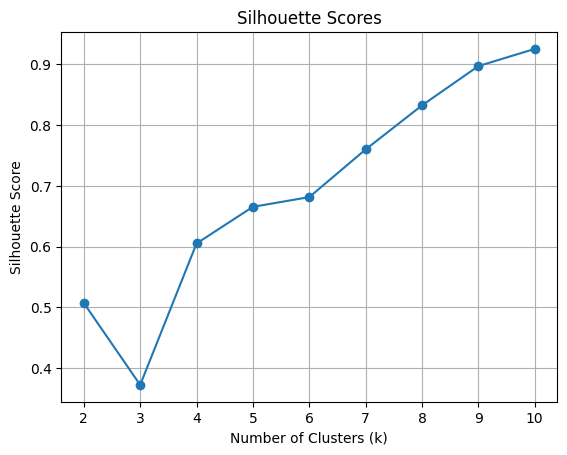

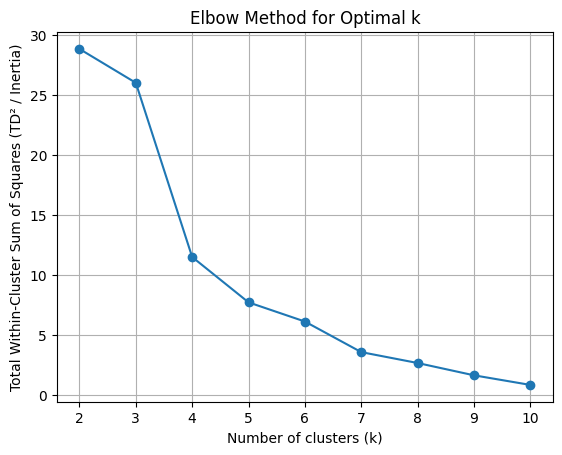

In [788]:
plot_elbow_method(ds_students[['willingness', 'place', 'flexible']], 10)

In [789]:
kmeans = KMeans(n_clusters=4, random_state=42)
ds_students['cluster'] = kmeans.fit_predict(ds_students[['willingness', 'place', 'flexible']])
ds_students.groupby('cluster').size()

cluster
0     3
1    33
2     3
3    28
dtype: int64

### Students in each cluster

In [790]:
display(ds_students['cluster'].value_counts())

cluster
1    33
3    28
2     3
0     3
Name: count, dtype: int64

### Cluster Displayed

In [791]:
for cluster in range(ds_students['cluster'].nunique()):
    print(f"### Cluster {cluster} ###")
    display(ds_students[ds_students['cluster'] == cluster][['name','nationality_group','willingness', 'expertise', 'place', 'flexible']])

### Cluster 0 ###


,name,nationality_group,willingness,expertise,place,flexible
13,Nicolaj Swyrtz,DK,0.0,1.0,1.0,0
33,Kagan Berberoglu,Non-EU,0.0,1.0,0.0,0
82,Mihir Chowdhury Shanto,Non-EU,0.0,0.0,0.0,0


### Cluster 1 ###


,name,nationality_group,willingness,expertise,place,flexible
0,Jakob Randa Mørk,DK,1.0,1.0,0.0,0
1,Ana Lazar,EU,1.0,0.0,1.0,0
3,SOHEL SARKER,Non-EU,1.0,1.0,1.0,0
5,Ghanashyam Shahi,Non-EU,1.0,0.0,0.5,0
8,Anjali Poudel,Non-EU,1.0,0.0,0.0,0
9,Alina Maharjan,Non-EU,1.0,0.0,0.0,0
14,Angela Karaj,EU,1.0,0.0,0.0,0
15,Rakshya Khatri,Non-EU,1.0,0.0,0.5,0
16,Deepesh Gautam,Non-EU,1.0,1.0,0.5,0
23,Stine Visgaard Nielsen,DK,1.0,0.0,0.0,0


### Cluster 2 ###


,name,nationality_group,willingness,expertise,place,flexible
2,Zorka Anna Sipos,EU,1.0,0.0,2.0,1
6,Nabina Neupane Chaurel,Non-EU,0.0,0.0,2.0,0
53,Simon Kolind Fuglsang,DK,0.0,0.0,2.0,0


### Cluster 3 ###


,name,nationality_group,willingness,expertise,place,flexible
11,ANTONIA VASIU,EU,1.0,0.0,0.0,1
17,Gespere Guerschom Guimbi Makita,DK,1.0,0.0,1.0,1
18,Oskar Elias Hviid Schwartz,DK,1.0,1.0,0.0,1
20,Rasmus Ross Kruse,DK,1.0,1.0,1.0,1
22,Georgios Pappas,EU,1.0,0.0,0.0,1
28,Dace Lensa,EU,1.0,0.0,0.0,1
31,Francisco Javier Ponce De Luque,EU,1.0,0.0,0.0,1
34,Romargio Arapi,EU,1.0,0.0,1.0,1
35,Jessica Hudson,Non-EU,1.0,1.0,0.5,1
36,Samsunnahar Dipa,Non-EU,1.0,0.0,0.5,1


### Cluster Analysis
- Cluster 0 -The Unwilling and inflexible

- Cluster 1 - The willing, but inflexible

- Cluster 2 - The ones who have limited time

- Cluster 3 - The willing flexible

Combine cluster 0 & 2 -> the lone wolfs

In [792]:
def get_student_from_nationality_group(df:pd.DataFrame, nationality_group: str):
    students = df[df['nationality_group'] == nationality_group]
    if students.empty:
        return
    student = students.sample(n=1, replace=False).iloc[0]
    return student


In [793]:
def find_similar(df: pd.DataFrame, student: pd.Series, features: list[str], atol: float = 0.1, max_atol=0.8, threshold = 4) -> pd.DataFrame:
    mask = np.ones(len(df), dtype=bool)
    for feature in features:
        mask &= np.isclose(df[feature], student[feature], atol=atol)
    similar_students = df[mask]
    
    if atol >= max_atol and similar_students.shape[0] < threshold:
        print(f"Could not find enough similar students for {student['name']} even with high tolerance.")
        return similar_students
    
    if similar_students.shape[0] < threshold:
        # increase the atol and try again
        return find_similar(df, student, features, atol=atol+0.1)
    
    return similar_students

In [794]:
def assign_students_to_study_group(target_df: pd.DataFrame, student_names: list[str], study_group_id: int):
    # Modify the main DataFrame using the 'name' column
    target_df.loc[target_df['name'].isin(student_names), 'study_group'] = study_group_id

In [795]:
def get_coder(df: pd.DataFrame, exclude_names: list[str]):
    if df.empty:
        return

    df_sorted = df.sort_values(by=['expertise'], ascending=False)
    top_coders = df_sorted[~df_sorted['name'].isin(exclude_names)]
    
    if top_coders.empty or top_coders.shape[0]==0:
        return
    return top_coders.iloc[0]

In [796]:
def get_non_coder(df: pd.DataFrame, exclude_names: list[str]):
    if df.empty:
        return
    
    df_sorted = df.sort_values(by=['expertise'], ascending=True)
    bottom_coders = df_sorted[~df_sorted['name'].isin(exclude_names)]

    if bottom_coders.empty or bottom_coders.shape[0]==0:
        return
    return bottom_coders.iloc[0]

## Making study groups for DS

In [797]:
pd.options.display.max_rows = None
MIN_GROUP_SIZE = 4
study_group_num = 0

pre_assigned_pairs = [('jemik25@student.sdu.dk','ninie25@student.sdu.dk')]
ds_students['study_group'] = np.nan
ds_students['study_group'] = ds_students['study_group'].astype(float)

for cluster in ds_students['cluster'].unique():
    print(f"Processing Cluster {cluster}")
    
    # Filter for this cluster's unassigned students just once before the loop
    unassigned_in_cluster: pd.DataFrame = ds_students[(ds_students['cluster'] == cluster) & (ds_students['study_group'].isnull())].copy()

    while True:
        # fail-safe break condition
        if study_group_num >= 200:
            print("Reached maximum number of study groups (200). Stopping assignment.")
            break

        # Check if exactly enough students remain to form one last group
        if unassigned_in_cluster.shape[0] <= MIN_GROUP_SIZE:
            print(f"Assigned {unassigned_in_cluster.shape[0]} students to study group {study_group_num} as the last group.")
            assigned_names = [s.name for s in unassigned_in_cluster.itertuples()]
            for student in unassigned_in_cluster.itertuples():
                ds_students.loc[ds_students['name'].isin(assigned_names), 'study_group'] = study_group_num

            study_group_num += 1
            break
        
        temp_group_members = []
        
        # Pick a random student from the available pool
        student_one = unassigned_in_cluster.sample(n=1).iloc[0]
        temp_group_members.append(student_one)
        
        # Check if student_one is in a pre-assigned pair
        # If so, add their pair to the group
        for pre_assigned_student_one, pre_assigned_student_two in pre_assigned_pairs:
            if student_one['email'] == pre_assigned_student_one:
                temp_group_members.append(unassigned_in_cluster[unassigned_in_cluster['email'] == pre_assigned_student_two].iloc[0])
                
            if student_one['email'] == pre_assigned_student_two:
                temp_group_members.append(unassigned_in_cluster[unassigned_in_cluster['email'] == pre_assigned_student_one].iloc[0])
        
        # Find students similar to the first one within the unassigned pool
        # Exclude student_one from the search pool
        search_pool = unassigned_in_cluster.drop(student_one.name)
        similar_students = find_similar(search_pool, student_one, ['willingness', 'place'], atol=0.1)
    
        if similar_students.shape[0] < 1 + 2 + 2:  # +2 for coder and non-coder, +2 for diversity
            continue

        # Add diversity by nationality
        possible_nationality_groups = ['DK', 'EU', 'Non-EU']
        unique_nationality_groups = set(student['nationality_group'] for student in temp_group_members)
        [possible_nationality_groups.remove(nat_group) for nat_group in unique_nationality_groups]
        
        # get one student from each of the other nationality groups
        for nationality_group in possible_nationality_groups:
            student = get_student_from_nationality_group(df=similar_students, nationality_group=nationality_group)
          
            if student is not None:
                temp_group_members.append(student)
      
        # Ensure at least one coder and one non-coder in the group
        # Exclude already selected students from the search pool
        non_coder = get_non_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
        if non_coder is not None:
            temp_group_members.append(non_coder)
            similar_students.drop(non_coder.name)
            
        if len(temp_group_members) <= MIN_GROUP_SIZE:
            # Only add a coder if the group doesn't already have enough members
            coder = get_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
            if coder is not None:
                temp_group_members.append(coder)
                similar_students.drop(coder.name)
        
            
        # Assign the group if it's large enough
        if len(temp_group_members) >= MIN_GROUP_SIZE:
            # Get the names of students in the newly formed group
            student_names = [student['name'] for student in temp_group_members]
            assign_students_to_study_group(target_df=ds_students, student_names=student_names, study_group_id=study_group_num)
            
            # Remove assigned students from the pool by filtering based on the 'name' column
            unassigned_in_cluster = unassigned_in_cluster[~unassigned_in_cluster['name'].isin(student_names)]
            
            print(f"Assigned {len(student_names)} students to study group {study_group_num}")
            study_group_num += 1
            
    print(f"Finished cluster {cluster}\n\n")

print(f"{ds_students['study_group'].isnull().sum()} students remain unassigned.")

Processing Cluster 1
Assigned 5 students to study group 0
Assigned 5 students to study group 1
Assigned 5 students to study group 2
Assigned 5 students to study group 3
Assigned 5 students to study group 4
Assigned 5 students to study group 5
Assigned 3 students to study group 6 as the last group.
Finished cluster 1


Processing Cluster 2
Assigned 3 students to study group 7 as the last group.
Finished cluster 2


Processing Cluster 3
Assigned 5 students to study group 8
Assigned 5 students to study group 9
Assigned 5 students to study group 10
Could not find enough similar students for Sigurd Hilmar Troelsen even with high tolerance.
Could not find enough similar students for Sigurd Hilmar Troelsen even with high tolerance.
Assigned 5 students to study group 11
Assigned 4 students to study group 12
Assigned 4 students to study group 13 as the last group.
Finished cluster 3


Processing Cluster 0
Assigned 3 students to study group 14 as the last group.
Finished cluster 0


0 students r

In [798]:
ds_students.sort_values('study_group')[['name', 'email', 'study_group', 'cluster']]

,name,email,study_group,cluster
0,Jakob Randa Mørk,jamoe25@student.sdu.dk,0.0,1
9,Alina Maharjan,almah25@student.sdu.dk,0.0,1
8,Anjali Poudel,anpou25@student.sdu.dk,0.0,1
24,Jesper Møberg Rasmussen,jrasm22@student.sdu.dk,0.0,1
27,Samuel Pavlinský,sapav22@student.sdu.dk,0.0,1
5,Ghanashyam Shahi,ghsha25@student.sdu.dk,1.0,1
16,Deepesh Gautam,degau25@student.sdu.dk,1.0,1
65,Himadri Saha Arka,hiark25@student.sdu.dk,1.0,1
68,Arbër Ledion Shabani,arsha12@student.sdu.dk,1.0,1
96,Andrei Manoloiu,anman25@student.sdu.dk,1.0,1


# Clustering DDBD

c:\Users\krist\Documents\Programming\Python\study-groups\.venv\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\krist\Documents\Programming\Python\study-groups\.venv\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\krist\Documents\Programming\Python\study-groups\.venv\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


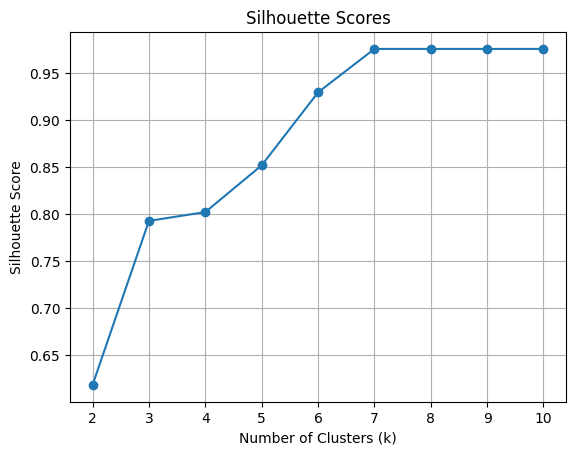

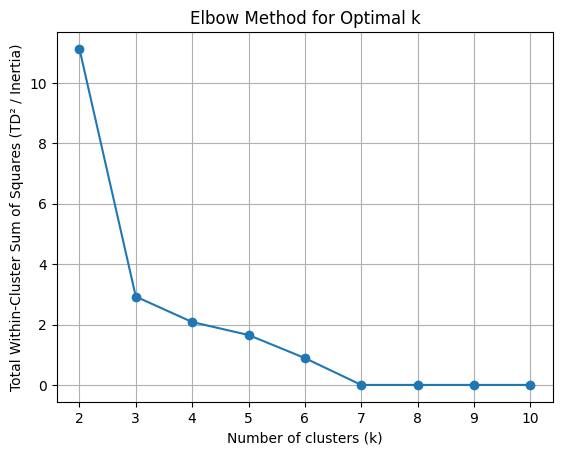

In [799]:
plot_elbow_method(non_ds_students[['willingness', 'place', 'flexible']], 10)

In [800]:
# k=4 despite the elbow method suggesting otherwise as the cluster analysis makes more sense to me
kmeans = KMeans(n_clusters=4, random_state=42)
non_ds_students['cluster'] = kmeans.fit_predict(non_ds_students[['willingness', 'place', 'flexible']])

### Students in each cluster

In [801]:
display(non_ds_students['cluster'].value_counts())

cluster
0    17
3    11
1    10
2     3
Name: count, dtype: int64

## Clustering Displayed

In [802]:
for cluster in range(non_ds_students['cluster'].nunique()):
    print(f"### Cluster {cluster} ###")
    display(non_ds_students[non_ds_students['cluster'] == cluster][['name','nationality_group','willingness', 'expertise', 'place', 'flexible']])

### Cluster 0 ###


,name,nationality_group,willingness,expertise,place,flexible
4,Lucie Eberová,Non-EU,1.0,0.0,0.5,1
12,Irene Tameni,Non-EU,1.0,0.0,0.0,1
19,Tancredi Calogero Piscitello,Non-EU,1.0,1.0,0.0,1
38,GEORGIOS KASKANIS,Non-EU,1.0,1.0,0.5,1
41,Mehmet Ali Yörük,Non-EU,1.0,0.0,0.5,1
50,Ahsanul Haque Khan,Non-EU,1.0,0.0,0.5,1
54,Natja Søe Lytje Hjerrild,Non-EU,1.0,0.0,0.5,1
59,Talha Ibne Shafiq,Non-EU,1.0,0.0,0.5,1
60,Nabil Adnan,Non-EU,1.0,0.0,0.5,1
74,Laura Holm Bendixen,Non-EU,1.0,0.0,0.5,1


### Cluster 1 ###


,name,nationality_group,willingness,expertise,place,flexible
7,Lasse Settergren-Rude,Non-EU,1.0,0.0,2.0,0
40,Laura Hviid Mogensen,Non-EU,1.0,1.0,2.0,0
67,Ruyi Zhong,Non-EU,1.0,0.0,2.0,0
70,Rita Kovats,Non-EU,1.0,1.0,2.0,0
77,Freja Kruse Rosener,Non-EU,1.0,1.0,2.0,0
83,Elena Petrova Trifonova,Non-EU,1.0,0.0,2.0,0
85,Szymon Stanulewicz,Non-EU,1.0,0.0,2.0,0
90,Line Bichel Nørbæk,Non-EU,1.0,0.0,2.0,0
91,Cecilie Sloth Mathiesen,Non-EU,1.0,0.0,2.0,0
99,Svetlin Zlatkov Lichev,Non-EU,1.0,1.0,2.0,0


### Cluster 2 ###


,name,nationality_group,willingness,expertise,place,flexible
10,Romina Schmidt,Non-EU,1.0,1.0,1.0,0
21,Mie Schack Poulsen,Non-EU,1.0,0.0,1.0,0
26,Md Taifur Hossain Dipto,Non-EU,1.0,0.0,1.0,0


### Cluster 3 ###


,name,nationality_group,willingness,expertise,place,flexible
32,Signe Dyreborg,Non-EU,1.0,1.0,0.5,0
39,Rasmus Nørgaard Larsen,Non-EU,1.0,0.0,0.5,0
42,Sasja Stein,Non-EU,0.0,0.0,0.5,0
49,Baljinder Kaur Ej Efternavn,Non-EU,1.0,0.0,0.5,0
56,Lisa Magagni,Non-EU,1.0,0.0,0.5,0
63,Rasmus Dute Jensen,Non-EU,1.0,1.0,0.5,0
73,Ghan Shyam Thapa,Non-EU,1.0,0.0,0.0,0
79,Jens Otto Grønning,Non-EU,1.0,1.0,0.5,0
98,Soney Shahi,Non-EU,1.0,0.0,0.0,0
101,Rowzatur Rumman Kashfi,Non-EU,1.0,0.0,0.5,0


### Cluster Analysis
- Cluster 0 -The flexible on campus

- Cluster 1 - The inflexible and no time

- Cluster 2 - The inflexible online

- Cluster 3 - The inflexible hybrid location


## Making study groups for DDBD

In [803]:
pd.options.display.max_rows = None
MIN_GROUP_SIZE = 5
study_group_num = ds_students['study_group'].max() + 1 # resuming the numbering from ds_students

pre_assigned_groups:list[list[str]] = [
    ['szsta25@student.sdu.dk', 'luweg22@student.sdu.dk', 'darad25@student.sdu.dk','dilia25@student.sdu.dk','jegro22@student.sdu.dk'],
    ['lamog20@student.sdu.dk', 'laben25@student.sdu.dk', 'frros25@student.sdu.dk','cemat25@student.sdu.dk','linoe25@student.sdu.dk']
    ]

for group in pre_assigned_groups:
    non_ds_students.loc[non_ds_students['email'].isin(group), 'study_group'] = study_group_num
    study_group_num += 1


non_ds_students['study_group'] = np.nan
non_ds_students['study_group'] = non_ds_students['study_group'].astype(float)

for cluster in non_ds_students['cluster'].unique():
    print(f"Processing Cluster {cluster}")
    
    # Filter for this cluster's unassigned students just once before the loop
    unassigned_in_cluster: pd.DataFrame = non_ds_students[(non_ds_students['cluster'] == cluster) & (non_ds_students['study_group'].isnull())].copy()
            

    while True:
        # fail-safe break condition
        if study_group_num >= 200:
            print("Reached maximum number of study groups (200). Stopping assignment.")
            break

        # Check if exactly enough students remain to form one last group        
        if unassigned_in_cluster.shape[0] <= MIN_GROUP_SIZE:
            # The last group of students are large enough to form a group
            print(f"Assigned {unassigned_in_cluster.shape[0]} students to study group {study_group_num} as the last group.")
            assigned_names = [s.name for s in unassigned_in_cluster.itertuples()]
            for student in unassigned_in_cluster.itertuples():
                non_ds_students.loc[non_ds_students['name'].isin(assigned_names), 'study_group'] = study_group_num
            
            study_group_num += 1
            break

        temp_group_members = []
        
        # Pick a random student from the available pool
        student_one = unassigned_in_cluster.sample(n=1).iloc[0]
        temp_group_members.append(student_one)
            
        # Find students similar to the first one within the unassigned pool
        # Exclude student_one from the search pool
        search_pool = unassigned_in_cluster.drop(student_one.name)
        similar_students = find_similar(search_pool, student_one, ['willingness', 'place'], atol=0.1)
    
        if similar_students.shape[0] < 1 + 2:  # +2 for coder and non-coder
            continue

      
        # Ensure at least one coder and one non-coder in the group
        # Exclude already selected students from the search pool
        temp_group_size = len(temp_group_members)
        if temp_group_size <= MIN_GROUP_SIZE - 3:
            # Get Coder
            coder = get_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
            temp_group_members.append(coder)
            
            # Get Non-Coder
            non_coder = get_non_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
            temp_group_members.append(non_coder)
            
            # Get Random student to fill in
            [temp_group_members.append(random_student) for _, random_student in similar_students.sample(n=MIN_GROUP_SIZE-len(temp_group_members), replace=False).iterrows()]
        
        elif temp_group_size <= MIN_GROUP_SIZE - 2:
            # Get Coder
            coder = get_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
            temp_group_members.append(coder)
            
            # Get Non-Coder
            non_coder = get_non_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
            temp_group_members.append(non_coder)
            
        elif temp_group_size <= MIN_GROUP_SIZE - 1:
            # Get Coder
            coder = get_coder(df=similar_students, exclude_names=[student['name'] for student in temp_group_members])
            temp_group_members.append(coder)
             
            
        # Assign the group if it's large enough
        if len(temp_group_members) >= MIN_GROUP_SIZE:
            # Get the names of students in the newly formed group
            student_names = [student['name'] for student in temp_group_members]
            assign_students_to_study_group(target_df=non_ds_students, student_names=student_names, study_group_id=study_group_num)
            
            # Remove assigned students from the pool by filtering based on the 'name' column
            unassigned_in_cluster = unassigned_in_cluster[~unassigned_in_cluster['name'].isin(student_names)]
            
            print(f"Assigned {len(student_names)} students to study group {study_group_num}")
            study_group_num += 1
            
    print(f"Finished cluster {cluster}\n\n")

print(f"{non_ds_students['study_group'].isnull().sum()} students remain unassigned.")

Processing Cluster 0
Assigned 5 students to study group 17.0
Assigned 5 students to study group 18.0
Assigned 5 students to study group 19.0
Assigned 4 students to study group 20.0 as the last group.
Finished cluster 0


Processing Cluster 1
Assigned 5 students to study group 21.0
Assigned 5 students to study group 22.0 as the last group.
Finished cluster 1


Processing Cluster 2
Assigned 3 students to study group 23.0 as the last group.
Finished cluster 2


Processing Cluster 3
Assigned 5 students to study group 24.0
Assigned 5 students to study group 25.0
Assigned 3 students to study group 26.0 as the last group.
Finished cluster 3


0 students remain unassigned.


# Explore Study Groups

## Combine data

In [804]:
# Combine dataframes
combined_data = pd.concat([ds_students, non_ds_students])
combined_data['study_group'] = combined_data['study_group'].astype(int)

In [805]:
combined_data['study_group'].value_counts()

study_group
0     5
2     5
1     5
8     5
4     5
11    5
3     5
5     5
9     5
17    5
22    5
10    5
21    5
24    5
18    5
12    4
13    4
20    4
7     3
14    3
6     3
23    3
19    3
25    3
26    3
Name: count, dtype: int64

In [806]:
print(f"Smallest study group has {combined_data['study_group'].value_counts().min()} members")
print(f"Largest study group has {combined_data['study_group'].value_counts().max()} members")

Smallest study group has 3 members
Largest study group has 5 members


# Export to data

In [807]:
combined_data.drop(columns=['willingness','expertise','place', 'flexible','before_after_classes','week_day_evenings','weekends','other','other_text','cluster'], inplace=True)
combined_data.sort_values('study_group', inplace=True)
combined_data.head()

,email,name,major,profile,nationality,nationality_group,campus,study_group
0,jamoe25@student.sdu.dk,Jakob Randa Mørk,Data Science,HI,Danmark,DK,Kolding,0
9,almah25@student.sdu.dk,Alina Maharjan,Data Science,EBA,Nepal,Non-EU,Kolding,0
8,anpou25@student.sdu.dk,Anjali Poudel,Data Science,EBA,Nepal,Non-EU,Kolding,0
24,jrasm22@student.sdu.dk,Jesper Møberg Rasmussen,Data Science,ICT,Danmark,DK,Kolding,0
27,sapav22@student.sdu.dk,Samuel Pavlinský,Data Science,ICT,Slovakiet,EU,Kolding,0


In [808]:
combined_data.to_csv('programming_course_study_groups.csv', index=False)
combined_data.to_excel('programming_course_study_groups.xlsx', index=False)